# Aproximación de funciones:
Implementar un perceptrón multicapa para aproximar la función f(x) = 0.5.sin(a.cos(x)).cos(2x) + 0.25.sin(x) en el intervalo x ∈ [0; 2π]. Generar conjuntos
de datos de distintos tamaños tomando valores a intervalos regulares o con una
distribución aleatoria uniforme.
Entrenar la red y analizar los resultados teniendo en cuenta las siguientes
variantes.
1. Para valores de a = 4, a = 8 y a = 16.
2. Con distintas cantidades de datos y de unidades ocultas.
3. Con entrenamiento incremental y por lotes.
4. Con y sin validación

Testear la capacidad de generalización comparando la función conocida junto a
la obtenida por la red:

1. Entrenando con una pequeña perturbación de error en la entrada y/o la
salida.
2. Considerando casos de interpolación y extrapolación


In [2]:
import numpy as np
from testing_utils import FuncionSigmoidea
from matplotlib import pyplot as mpl
from perceptron_multicapa import PerceptronMulticapa

In [9]:
P = 100
a = 4
x = np.linspace( 0, 2*np.pi, P)
z = 0.5 * np.sin(a*np.cos(x)) * np.cos(2*x)

In [7]:
M = 1
func_sigmoidea = FuncionSigmoidea()
lin = lambda x: x
const = lambda x: 1
sig = func_sigmoidea.getG('bipolar')
sig_der = func_sigmoidea.getdGdx('bipolar')

[5.07732146 0.76159822 0.19039955 2.85599332 1.77706251 3.68105806
 5.01385494 4.25225672 3.4906585  3.55412502 2.03092858 2.28479466
 0.95199777 1.90399555 3.23679243 5.33118753 5.77545316 4.56958931
 5.14078798 0.12693304 0.63466518 2.60212725 2.0943951  0.88853126
 0.31733259 3.87145761 4.75998887 1.96746207 4.44265628 5.64852012
 5.9023862  6.02931923 1.01546429 2.66559377 2.98292636 1.20586385
 3.36372547 5.39465405 4.69652235 1.45972992 4.31572324 3.61759154
 0.25386607 1.07893081 0.6981317  4.88692191 2.7925268  3.8079911
 0.         2.41172769 4.63305583 1.3962634  3.30025895 2.47519421
 4.82345539 5.2042545  4.37918976 4.06185717 4.1887902  3.17332591
 2.22132814 5.52158709 6.28318531 5.83891968 2.72906028 0.06346652
 3.93492413 5.71198664 0.44426563 3.42719199 0.82506474 3.99839065
 2.91945984 2.34826118 1.26933037 0.50773215 5.45812057 3.74452458
 4.95038842 2.53866073 6.15625227 1.65012947 3.10985939 4.12532369
 1.71359599 1.33279688 1.58666296 5.58505361 2.15786162 4.50612

C:\Python39\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Patricio\Desktop\Redes Neuronales\perceptron_multicapa.py:57: RuntimeWarning: invalid value encountered in multiply
  D = PerceptronMulticapa.bias_sub(E*dY)
c:\Users\Patricio\Desktop\Redes Neuronales\perceptron_multicapa.py:90: RuntimeWarning: overflow encountered in square
  e += np.mean(np.sum(np.square(Zh-Yh[-1]), axis=1))


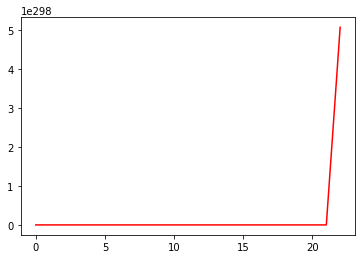

AxisError: axis 1 is out of bounds for array of dimension 1

In [13]:

N = 1

indexes = np.random.permutation(x.shape[0])
percentaje = int(0.05 * P)
tst = indexes[-percentaje:]
trn = indexes[:-percentaje]

print(x[trn])
print(z[trn])

pmc = PerceptronMulticapa([N, 8, 5, 1], [sig, sig, lin], [sig_der,sig_der, const], 0.1, 10)
E = pmc.fit(x[trn], z[trn])
print(
    f'La cantidad de bits de entrada es {N}\nEl último error es de {E[-1]}')
mpl.plot(E, 'r')
mpl.show()

Y = pmc.activacion(x[tst])
e = np.mean(np.sum(np.square(z[tst]-Y[-1]), axis=1))
print(e)

